In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'C:\Users\VISHAL KUMAR\Downloads\Udemy_Course_1\4. Flight Price\Flight price_Documents\Project 3_Flight price\Data_Train.xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_data = df

In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
train_data.shape

(10683, 11)

In [8]:
train_data.dropna(inplace=True)
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [10]:
#defininf function to convert to date time format
def change_into_datetime(col):
    train_data[col]=pd.to_datetime(train_data[col])

In [11]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [12]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    change_into_datetime(i)

In [13]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
#all formates have been changes for the respective ones

In [15]:
train_data['journey_day']=train_data['Date_of_Journey'].dt.day
train_data['journey_month']=train_data['Date_of_Journey'].dt.month

In [16]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-07-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-15 05:50:00,2022-07-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-15 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-07-15 18:05:00,2022-07-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-07-15 16:50:00,2022-07-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [17]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [18]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-07-15 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-07-15 05:50:00,2022-07-15 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-07-15 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-07-15 18:05:00,2022-07-15 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-07-15 16:50:00,2022-07-15 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [19]:
#define a funtion to extract hour and time preciselt

In [20]:
def extract_hour(df,col):
    df[col+'_hour']=df[col].dt.hour
#conctaticatin

def extract_min(df,col):
    df[col+'_minute']=df[col].dt.minute
    
def drop_column(df,col):
    df.drop(col,axis=1,inplace=True)    

In [21]:
extract_hour(train_data,'Dep_Time')
extract_min(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [22]:
extract_hour(train_data,'Arrival_Time')
extract_min(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [24]:
#preprocess the duration feature
#have to brinng all the enties at same patterm

In [25]:
duration=list(train_data['Duration'])

In [26]:
x='2h 50m'
len(x.split(' '))

2

In [27]:
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else: 
        if 'h' in duration[i]:
            duration[i]=duration[i]+' 0m'
            ##duration[i]+' '+'0m'
        else:
            duration[i]='0h '+ duration[i]
        

In [28]:
train_data['Duration']=duration

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [30]:
'2h 50m'.split(' ')[1][0:-1]

'50'

In [31]:
def hour(x):
    return x.split(' ')[0][0:-1]
def minute(x):
    return x.split(' ')[1][0:-1]

In [32]:
train_data['Duration_hours']=train_data['Duration'].apply(hour)
train_data['Duration_mins']=train_data['Duration'].apply(minute)

In [33]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [34]:
drop_column(train_data,'Duration')

In [35]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours         object
Duration_mins          object
dtype: object

In [36]:
train_data['Duration_hours']=train_data['Duration_hours'].astype(int)
train_data['Duration_mins']=train_data['Duration_mins'].astype(int)

In [37]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Arrival_Time_minute     int64
Duration_hours          int32
Duration_mins           int32
dtype: object

In [38]:
#categorical or continous data differentuatuoin is important 
# to apply data encoding


In [39]:
cat_col = [col for col in train_data.columns if train_data[col].dtype=='O']
cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [40]:
cont_col = [col for col in train_data.columns if train_data[col].dtype!='O']
cont_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_hours',
 'Duration_mins']

In [41]:
#feature encoding
#categorical is of two types :nominal and ordinal data


In [42]:
#nominal data: data which are not in any order -- onehot encodig
#ordinal data: data having some kind of hierarchy -- LabelEncoding

In [43]:
categorical=train_data[cat_col]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [44]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

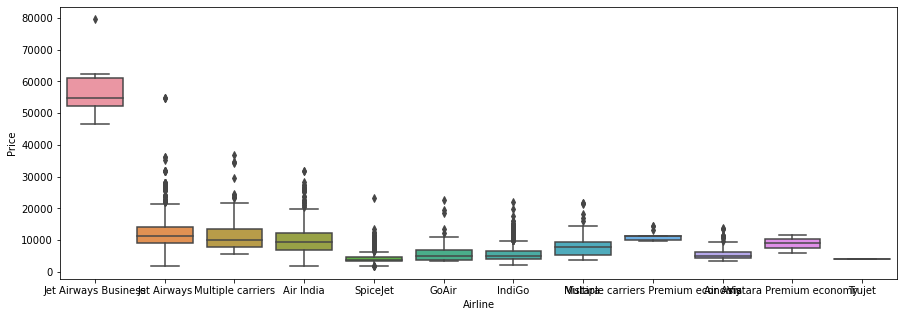

In [45]:
plt.figure(figsize=(15,5))

sns.boxplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False))

In [46]:
#jetairwasy has highest price

In [47]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

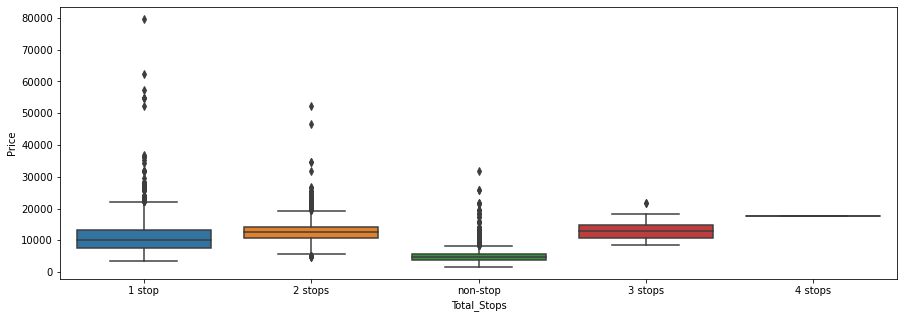

In [48]:
plt.figure(figsize=(15,5))

sns.boxplot(x='Total_Stops',y='Price',data=train_data.sort_values('Price',ascending=False))

In [49]:
#string nature wld not work
#gotta use hot encoding for the airline name

In [50]:
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)
Airline.head()

#drop_first will basically stop from making any repeaated values

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [51]:
#now we have to dummify the source column

In [52]:
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<AxesSubplot:xlabel='Source', ylabel='Price'>

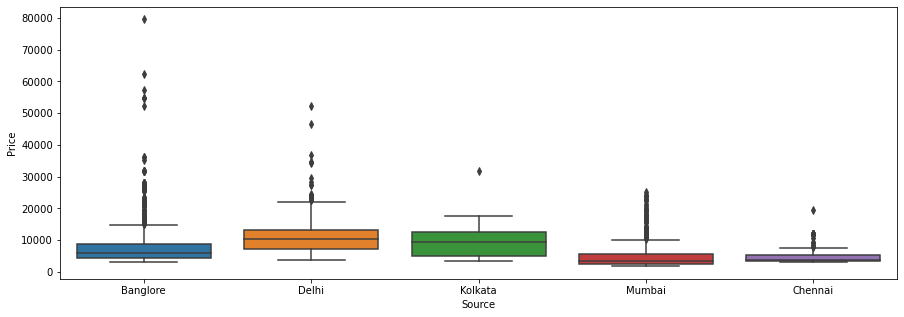

In [53]:
plt.figure(figsize=(15,5))

sns.boxplot(x='Source',y='Price',data=train_data.sort_values('Price',ascending=False))

In [54]:
#now we have to dummify the source column

In [55]:
Source=pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [56]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<AxesSubplot:xlabel='Destination', ylabel='Price'>

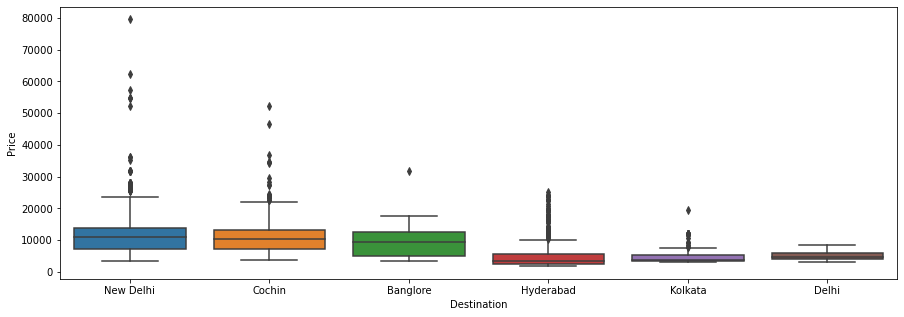

In [57]:
plt.figure(figsize=(15,5))

sns.boxplot(x='Destination',y='Price',data=train_data.sort_values('Price',ascending=False))

In [58]:
#gotta dummify the destination 

In [59]:
Destination=pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [60]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [61]:
#gotta work on route feature , it seems to be kinda messy

In [62]:
'DEL → LKO → BOM → COK'.split(' → ')

['DEL', 'LKO', 'BOM', 'COK']

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
categorical['Route_1']=categorical['Route'].str.split(' → ').str[0]
categorical['Route_2']=categorical['Route'].str.split(' → ').str[1]
categorical['Route_3']=categorical['Route'].str.split(' → ').str[2]
categorical['Route_4']=categorical['Route'].str.split(' → ').str[3]
categorical['Route_5']=categorical['Route'].str.split(' → ').str[4]
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [65]:
drop_column(categorical,'Route')

In [66]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Additional_Info        0
Route_1                0
Route_2                0
Route_3             3491
Route_4             9116
Route_5            10636
dtype: int64

In [67]:
for i in ['Route_3','Route_4','Route_5']:
    categorical[i].fillna('None',inplace=True)
    

In [68]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Route_1            0
Route_2            0
Route_3            0
Route_4            0
Route_5            0
dtype: int64

In [69]:
##no missing values here

In [70]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

Airline has total 12 categories
Source has total 5 categories
Destination has total 6 categories
Total_Stops has total 5 categories
Additional_Info has total 10 categories
Route_1 has total 5 categories
Route_2 has total 40 categories
Route_3 has total 27 categories
Route_4 has total 12 categories
Route_5 has total 6 categories


In [71]:
#hot encoding cant be used for such high dimensionality issue
##route 3 , 4  and others have many categories

In [72]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2 stops,No info,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2 stops,No info,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1 stop,No info,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1 stop,No info,BLR,NAG,DEL,None,None


In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
encoder=LabelEncoder()

In [75]:
categorical.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'],
      dtype='object')

In [76]:
for i in['Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [77]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,No info,0,10,21,10,4
1,Air India,Kolkata,Banglore,2 stops,No info,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,No info,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,No info,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1 stop,No info,0,29,7,10,4


In [78]:
## feature encoding comes into importance here

In [79]:
drop_column(categorical,'Additional_Info')
##this had no significane

In [80]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [81]:
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,non-stop,0,10,21,10,4
1,Air India,Kolkata,Banglore,2 stops,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,2 stops,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,1 stop,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,1 stop,0,29,7,10,4


In [82]:
dict={'non-stop':0, '2 stops':1, '1 stop':2, '3 stops':3, '4 stops':4}
                    #converting into integer format

In [83]:
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)
categorical.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,0,10,21,10,4
1,Air India,Kolkata,Banglore,1,2,20,1,3,4
2,Jet Airways,Delhi,Cochin,1,3,27,4,5,4
3,IndiGo,Kolkata,Banglore,2,2,29,3,10,4
4,IndiGo,Banglore,New Delhi,2,0,29,7,10,4


In [84]:
#concaticating all the data frames we have and all the previous ones too

In [85]:
data_train=pd.concat([categorical,Airline,Source,Destination,train_data[cont_col]],axis=1)
data_train.head()

,Airline,Source,Destination,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,0,10,21,10,4,0,...,1,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,1,2,20,1,3,4,1,...,0,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,1,3,27,4,5,4,0,...,0,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,2,2,29,3,10,4,0,...,0,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,2,0,29,7,10,4,0,...,1,13302,3,1,16,50,21,35,4,45


In [86]:
drop_column(data_train,'Airline')
drop_column(data_train,'Source')
drop_column(data_train,'Destination')

In [87]:
## we have to see all the columns of the table 
## so we need to expand the viewing capacity

pd.set_option('display.max_columns',40)
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897,24,3,22,20,1,10,2,50
1,1,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662,5,1,5,50,13,15,7,25
2,1,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882,6,9,9,25,4,25,19,0
3,2,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218,5,12,18,5,23,30,5,25
4,2,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302,3,1,16,50,21,35,4,45


In [88]:
#selection of outliers in our data
#distribution and boxplot approach is helpful
#and removing the affects of our outliers

In [89]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    

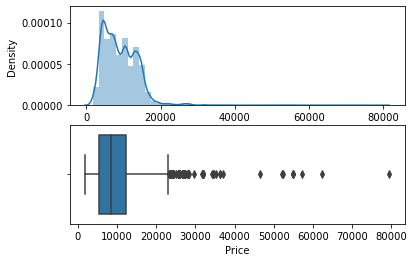

In [90]:
plot(data_train,'Price')

In [91]:
#greater than 40000 is an outlier
#replace it with median 
#to cancel the affect of our outliers

In [92]:
data_train['Price']=np.where(data_train['Price']>=40000,data_train['Price'].median(),data_train['Price'])

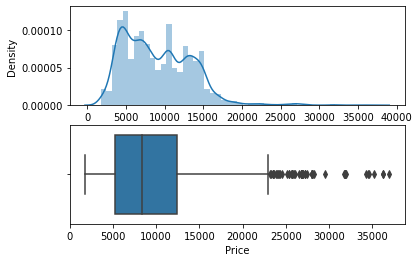

In [93]:
def plot(df,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)
    
plot(data_train,'Price')

In [94]:
#seperation of dependent nd independent features

In [95]:
data_train.head()

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3897.0,24,3,22,20,1,10,2,50
1,1,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7662.0,5,1,5,50,13,15,7,25
2,1,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,13882.0,6,9,9,25,4,25,19,0
3,2,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,6218.0,5,12,18,5,23,30,5,25
4,2,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,13302.0,3,1,16,50,21,35,4,45


In [96]:
X = data_train.drop('Price',axis=1)  #price was an dependent feature
X.head()

## x is a completely independent data set

,Total_Stops,Route_1,Route_2,Route_3,Route_4,Route_5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,journey_day,journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_mins
0,0,0,10,21,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24,3,22,20,1,10,2,50
1,1,2,20,1,3,4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,1,5,50,13,15,7,25
2,1,3,27,4,5,4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,6,9,9,25,4,25,19,0
3,2,2,29,3,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,5,12,18,5,23,30,5,25
4,2,0,29,7,10,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,1,16,50,21,35,4,45


In [97]:
X.shape

(10682, 34)

In [98]:
Y=data_train['Price']
Y.head()

0     3897.0
1     7662.0
2    13882.0
3     6218.0
4    13302.0
Name: Price, dtype: float64

In [99]:
#feature selection
##a good relationship between our feature and our target feature
## best feature to be choosen to neglect the multi dimension problem

In [100]:
from sklearn.feature_selection import mutual_info_classif

In [101]:
mutual_info_classif(X,Y)

array([2.1328843 , 2.05514775, 2.45125746, 2.21647308, 1.06648183,
       1.76420813, 0.75395347, 0.10800194, 0.68011105, 0.940909  ,
       0.        , 0.58536911, 0.02796155, 0.31455053, 0.        ,
       0.22490101, 0.        , 0.1599727 , 1.54661462, 0.8974275 ,
       0.28358686, 1.54818416, 0.40519582, 0.29464889, 0.17947839,
       0.38756583, 1.07260554, 0.87408827, 1.42364228, 1.19312762,
       1.84959529, 1.49618723, 1.77935409, 1.05606023])

In [102]:
imp= pd.DataFrame(mutual_info_classif(X,Y),index=X.columns)
imp

,0
Total_Stops,2.160246
Route_1,2.077067
Route_2,2.448779
Route_3,2.227712
Route_4,1.107625
Route_5,1.813826
Air India,0.772561
GoAir,0.103725
IndiGo,0.686785
Jet Airways,0.892239


In [103]:
imp.columns=['Importance']
imp.sort_values(by='Importance',ascending=False)

,Importance
Route_2,2.448779
Route_3,2.227712
Total_Stops,2.160246
Route_1,2.077067
Arrival_Time_hour,1.842867
Route_5,1.813826
Duration_hours,1.793155
Cochin,1.550676
Delhi,1.541921
Arrival_Time_minute,1.529683


In [104]:
## the above table shows us the importance of different featueres
## with respect to our dependent feature that is the cost

In [105]:
## apply our machine learning on our data
##automagte my predictions using a function

In [106]:
#we have a regressionn use case
#mean square error / r2 / rmse/ mae / --business matrix

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [109]:
from sklearn import metrics

In [110]:
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('My r2 is {}'.format(r2_score))
    
    print('My mean absolute error is {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('My mean squared error is {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('My root mean square error is {}'.format(np.sqrt(metrics.mean_absolute_error(y_test,y_prediction))))
           
    sns.distplot(y_test-y_prediction)


In [111]:
### normal distribution is damn good

In [112]:
from sklearn.ensemble import RandomForestRegressor
##regressor use case is ours

Training score : 0.9524291661456044
Predictions are : [16742.7         6288.16        8870.         ...  6885.26
 12893.36666667 13332.78616667]


My r2 is 0.8315674793180516
My mean absolute error is 1143.557981815434
My mean squared error is 3449459.4758052016
My root mean square error is 33.81653414848177


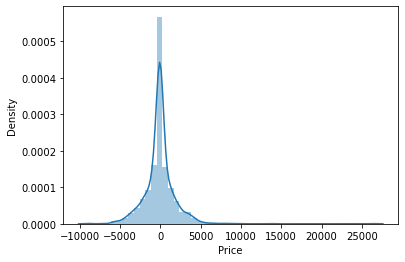

In [113]:
predict(RandomForestRegressor())

In [114]:
#its a normal distribution so our algo is running at the best

#just choose the model/algorithm u wanna run and 
##put it in the above defined function and we will get the reult of
## our applied algo -- either it is linear/logistic/decisiontree/knn

In [115]:
## dump your model
## and play with different algos

In [116]:
## Dumping helps u to save ur model for sometime else
## we dont want to code again nd again

In [117]:
import pickle
def predict(ml_model,dump):
    model=ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('Predictions are : {}'.format(y_prediction))
    print('\n')
    
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('My r2 is {}'.format(r2_score))
    
    print('My mean absolute error is {}'.format(metrics.mean_absolute_error(y_test,y_prediction)))
    print('My mean squared error is {}'.format(metrics.mean_squared_error(y_test,y_prediction)))
    print('My root mean square error is {}'.format(np.sqrt(metrics.mean_absolute_error(y_test,y_prediction))))
           
    sns.distplot(y_test---y_prediction)

    ##gotta use file handling technique
    ## .pkl is the extension
    
    
    if dump==1:
        file=open(r'C:\Users\VISHAL KUMAR\Downloads\Udemy_Course_1\4. Flight Price\Flight price_Documents\Project 3_Flight price\model.pkl','wb')
        pickle.dump(model,file)
    

Training score : 0.9521415006805252
Predictions are : [16737.24        6317.22        8886.82       ...  6781.17
 12909.54333333 13134.73783333]


My r2 is 0.8332542354824076
My mean absolute error is 1140.0416003422827
My mean squared error is 3414915.0955931554
My root mean square error is 33.764502074549874


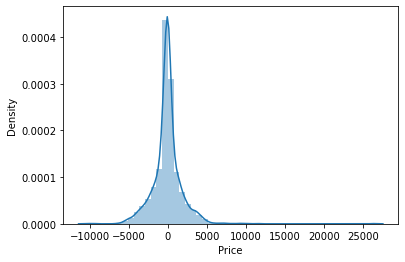

In [118]:
predict(RandomForestRegressor(),1)

In [119]:
## a new file with the pkl extension is created in the folder
## this is the above random forrest model

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Training score : 0.6113211063942217
Predictions are : [12427.49669543  8357.32226751  9544.2749469  ...  7153.60192319
 10796.97216713 11762.21009764]


My r2 is 0.6092572076853805
My mean absolute error is 1957.0043457551428
My mean squared error is 8002322.960524945
My root mean square error is 44.23804183906814


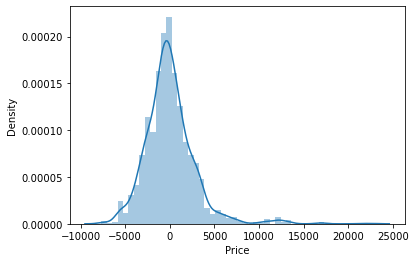

In [121]:
predict(LinearRegression(),0)

Training score : 0.9656605025637308
Predictions are : [16840.  4959.  8085. ...  7006. 13339. 14335.]


My r2 is 0.752389526483169
My mean absolute error is 1299.9882545624707
My mean squared error is 5071005.82905891
My root mean square error is 36.05534987435943


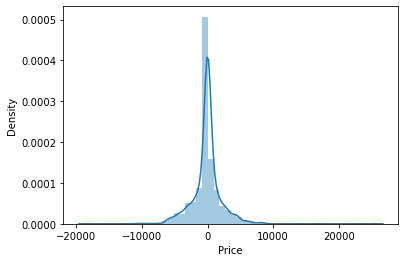

In [122]:
predict(DecisionTreeRegressor(),0)

Training score : 0.7755318651299267
Predictions are : [16315.   5158.2  8441.6 ...  6471.8  7140.  11467.6]


My r2 is 0.6432831956400926
My mean absolute error is 1772.9017313991576
My mean squared error is 7305478.5144595215
My root mean square error is 42.10583963536599


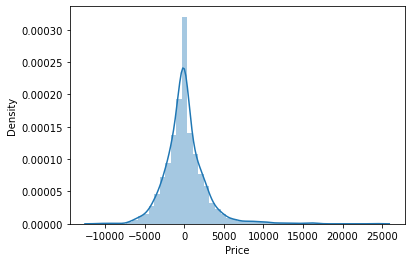

In [123]:
predict(KNeighborsRegressor(),0)

In [124]:
##data set is huge so KNN is not advicable
## and we can see the best accuracy is of Random FOrest
## by comparing the r2 square

In [125]:
##can also play with svr and multiple regressors

In [126]:
## hypertune my model
# hyper-parametric training is imp
##cross validation is important
##we gonna see that now
## cross validation will return us the best set of parameters

In [127]:
## randomized search approach or grid search cv are the basics one we gonna see here

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
reg_rf = RandomForestRegressor()

In [130]:
from sklearn.model_selection import RandomizedSearchCV

In [131]:
## no of decision trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]
 ##a code of list comprehension

max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=4)]


In [132]:
random_grid={
    'n_estimators':n_estimators,
    'max_features':['auto','sqrt'],
    'max_depth':max_depth,
    'min_samples_split':[5,10,15,100]
}

In [133]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [147]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [135]:
rf_random.best_params_

{'n_estimators': 980,
 'min_samples_split': 5,
 'max_features': 'sqrt',
 'max_depth': 21}

In [146]:
prediction = rf_random.predict(X_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

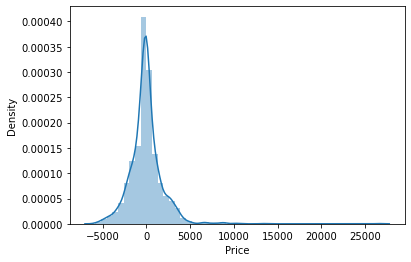

In [137]:
sns.distplot(y_test-prediction)

In [138]:
metrics.r2_score(y_test,prediction)

0.8338460436853251

In [139]:
## the accuracy has increased proving to us that
## hypertuning always increases our accuracy

In [148]:
file=open(r'C:\Users\VISHAL KUMAR\Downloads\Udemy_Course_1\4. Flight Price\Flight price_Documents\Project 3_Flight price\rf_random.pkl','wb')
pickle.dump(rf_random,file)

##why is it taking 0 kb space in the folder

In [141]:
# model=open(r'C:\Users\VISHAL KUMAR\Downloads\Udemy_Course_1\4. Flight Price\Flight price_Documents\Project 3_Flight price\model.pkl','rb')

In [142]:
forest = pickle.load(open(r'C:\Users\VISHAL KUMAR\Downloads\Udemy_Course_1\4. Flight Price\Flight price_Documents\Project 3_Flight price\model.pkl','rb'))
forest

RandomForestRegressor()

In [143]:
predictions2 = forest.predict(X_test)

## just gotta pass the new data set here in place of X_test, and
## u will keep getting different accuracy

In [144]:
metrics.r2_score(y_test,predictions2)

0.8332542354824076